In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
sns.set()

In [4]:
data=pickle.load(open("ts/vcresults.txt","rb"))
data_o=pickle.load(open("ts/vcresults-2.txt","rb"))

data_o['memcachedb']

OrderedDict([('2008', []),
             ('2009', [1931, 203]),
             ('2010', [742, 557, 266, 177, 184, 1671, 1435]),
             ('2011', [223, 1026, 846, 1704, 1146]),
             ('2012', [688, 253, 447]),
             ('2013', [91, 41, 944]),
             ('2014', [328, 434]),
             ('2015', [23, 160, 251]),
             ('2016', [115, 229]),
             ('2017', [554, 13, 38, 24])])

In [5]:
#print(data_o.keys())

nosql={}
nosql["keyvalue"]=['redis','dynamo','dbm','aerospike', 'memcachedb', 'riak', 'berkeley db']
nosql["column"]=['cassandra','hbase','vertica','accumulo','druid']
nosql["graph"]=['neo4j','virtuoso','allegrograph']
nosql["document"]=['mongodb','apache couchdb', 'basex','cosmos db', 'rethinkdb']
nosql["multimodel"]=['arangodb','couchbase', 'marklogic','orientdb']
nosql["Comparison"]=["mongodb","neo4j","cassandra","redis"]

#nosql["MongoDB"]=['ruby','python', 'php', 'java', 'js', '.net',  'node', 'c++', 'c#']
#nosql["Cassandra-Versions"]=['c2.0', 'c3.0', 'c0.7', 'c2.1', 'c2.2']
#nosql["Cassandra"]=['spark', 'c-jdbc', '.net library', 'python driver', 'node driver', 'c# driver']
#nosql["Hadoop"]=['hadoop','hadoop 2', 'hadoop3','hdfs']
#nosql["NewSQL"]=['voltdb', 'â€žcockroachdb', 'nuodb', 'hana', 'memsql']


In [18]:
import math

for i in data_o:
    sum=[]
    for year in data_o[i]:
        #print(i,year,data_o[i][year])
        sum.extend(data_o[i][year])
    try:
        print(i,math.floor(np.mean(sum)))
    except:
        print(i,0)

mongodb 1282
cassandra 1030
redis 1491
hbase 1265
oracle nosql 234
dbm 979
couchbase 568
dynamo 982
neo4j 530
orientdb 329
hdfs 1626
hadoop 1427
hadoop 2 387
hadoop3 36
accumulo 401
druid 341
vertica 682
apache couchdb 980
arangodb 187
basex 440
cosmos db 464
marklogic 231
rethinkdb 290
aerospike 284
memcachedb 540
mumps 475
riak 530
berkeley db 1097
allegrograph 298
virtuoso 387
voltdb 622
â€žcockroachdb 0
nuodb 2213
hana 633
memsql 547
python 1032
php 1522
java 1153
js 1064
.net 822
ruby 725
node 1286
c++ 340
c# 442
c2.0 949
c3.0 94
c0.7 314
c2.1 287
c2.2 79
spark 500
c-jdbc 1251
.net library 509
python driver 0
node driver 0
c# driver 0


c:\users\abhinav\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\abhinav\appdata\local\programs\python\python36-32\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


c:\program files (x86)\python36-32\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


keyvalue


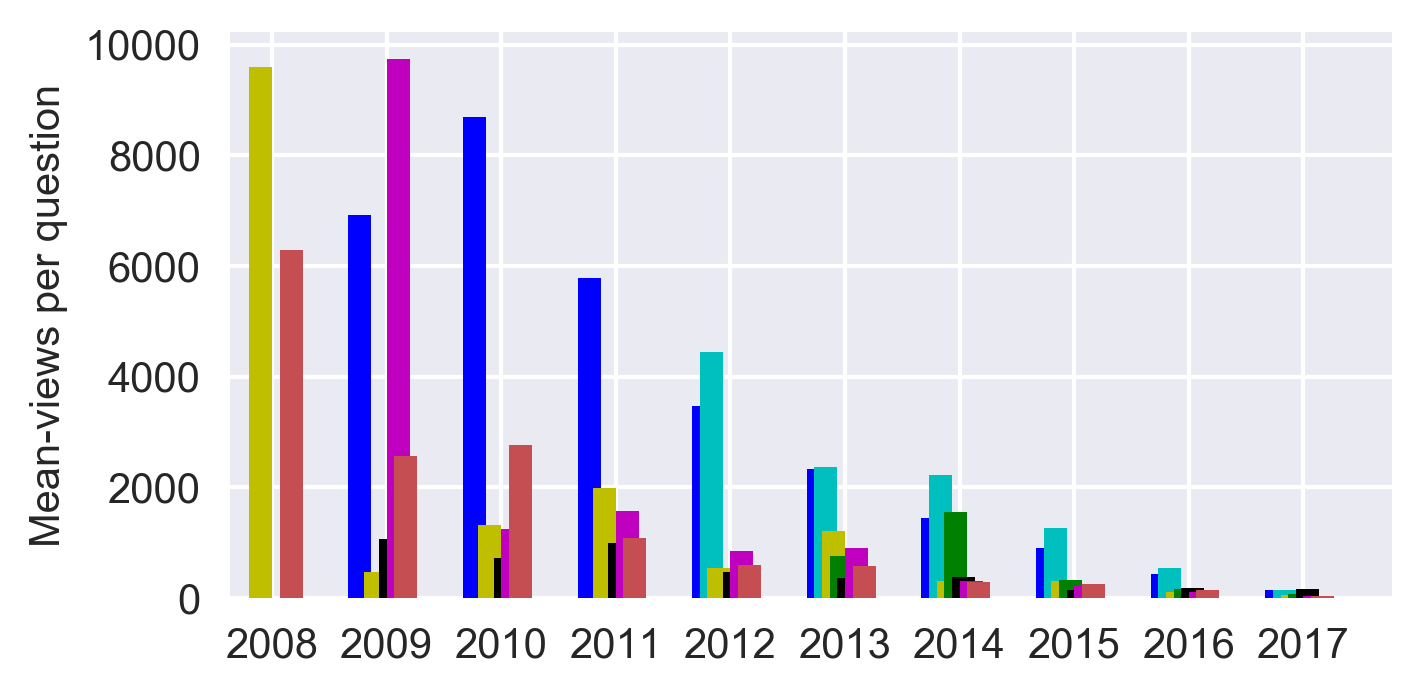

column


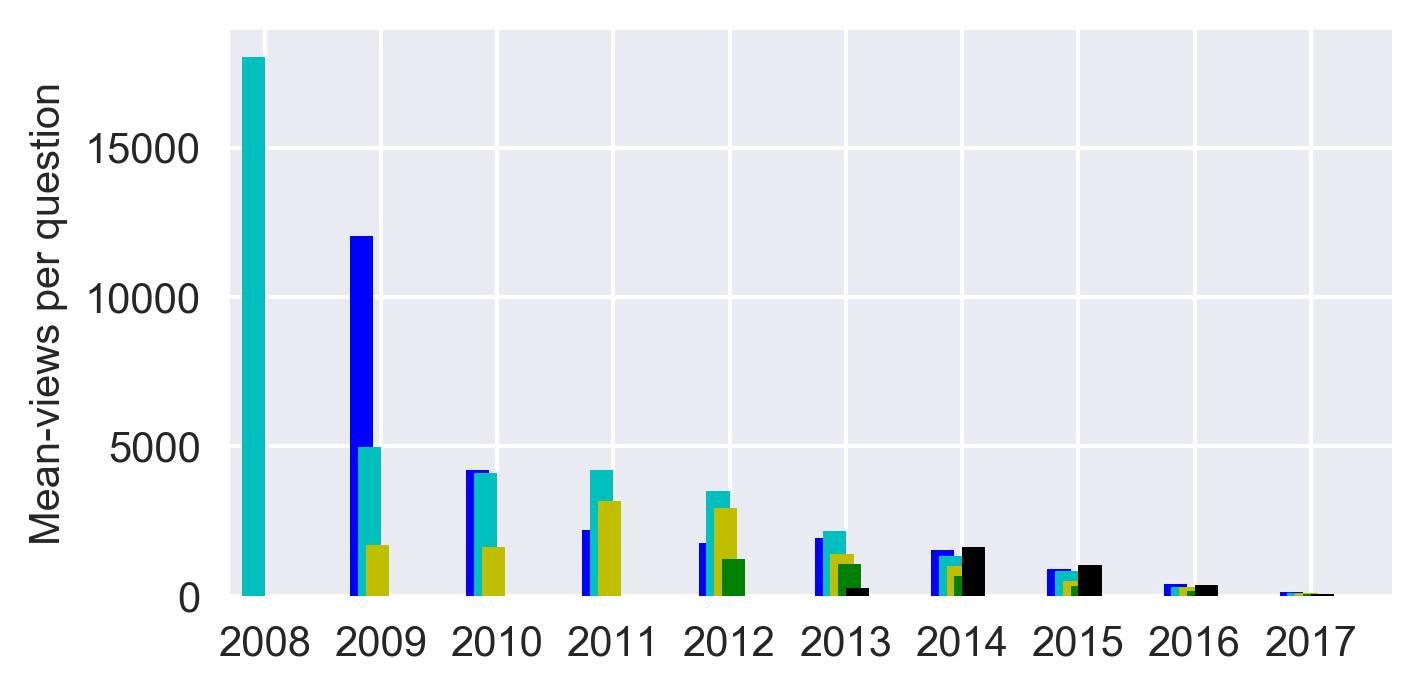

graph


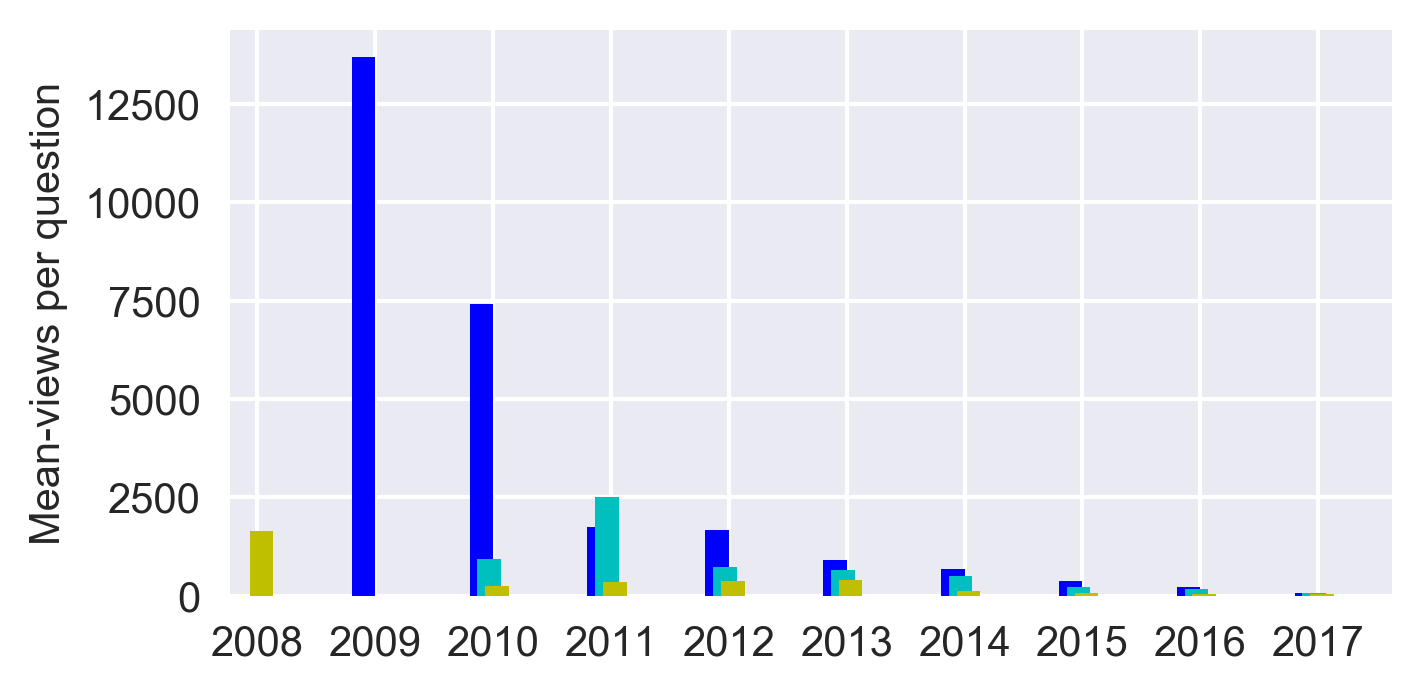

document


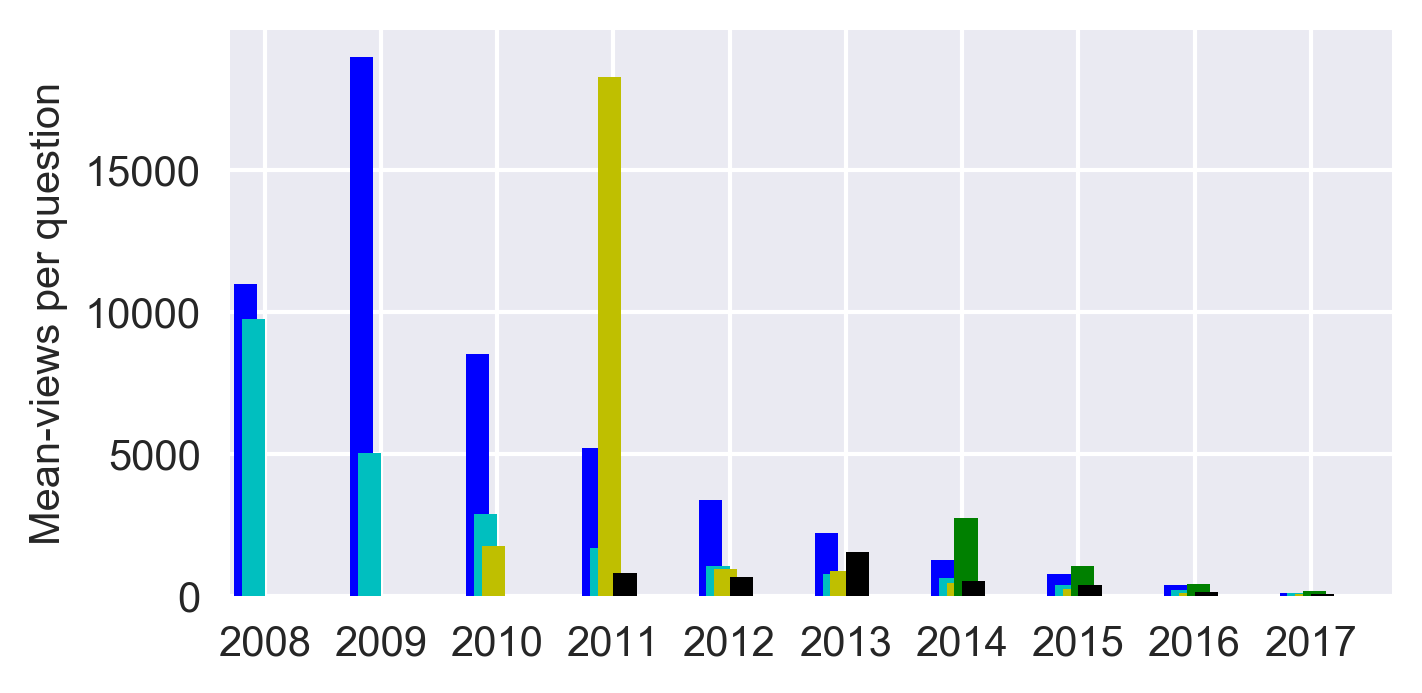

multimodel


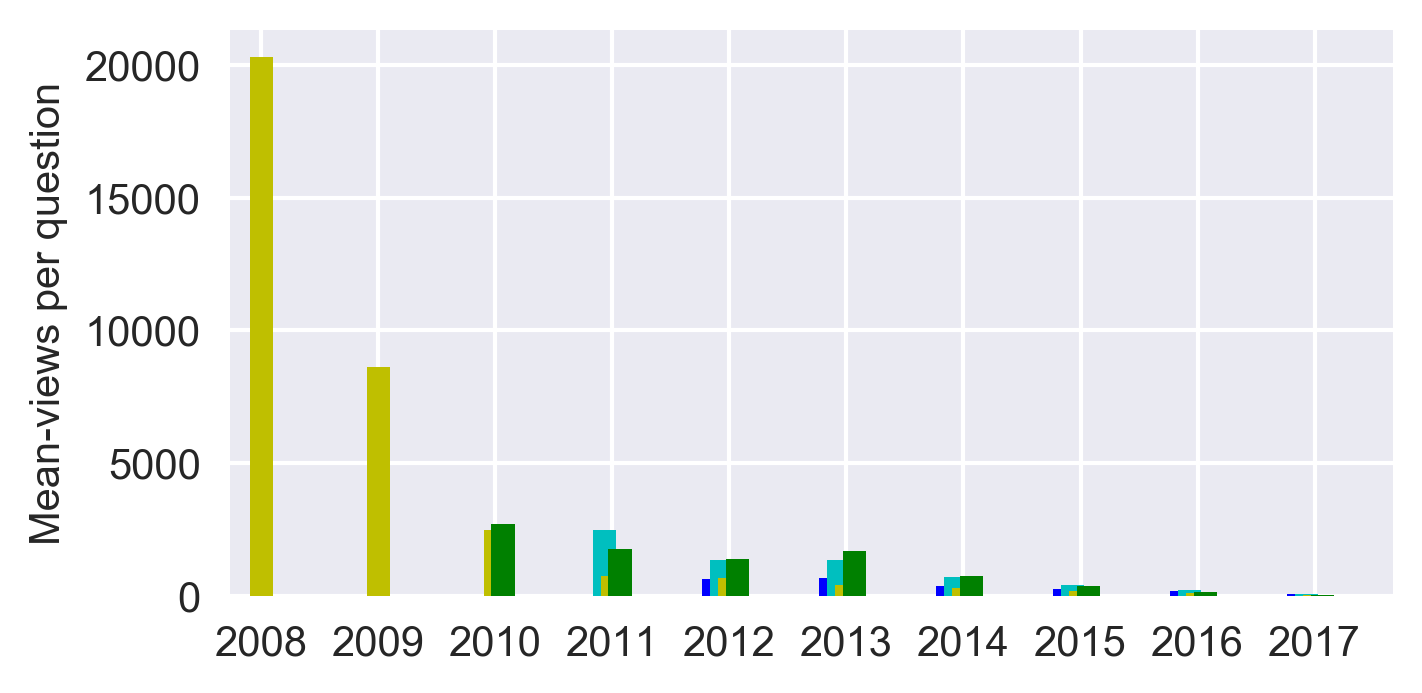

Comparison


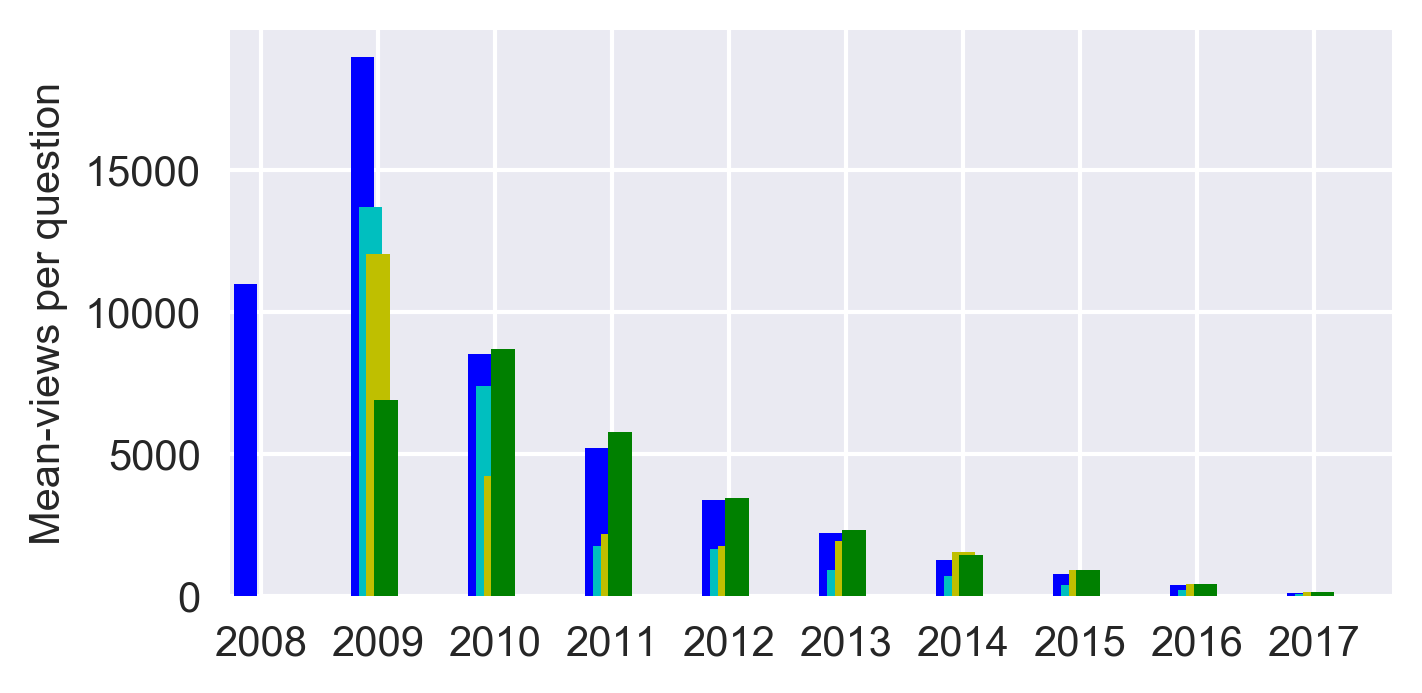

In [8]:
colors=['b','c','y','g','k','m','C2','C2','C3','C4']
for family in nosql:
    plt.close()
    plt.subplots(figsize=(5,2.5),dpi=300)
    count=0
    t=0
    for year in data_o['mongodb']:
        #print(year,[data_o[dbs][year] for dbs in nosql[family]])
        #print(year,family,[data_o[dbs][year] for dbs in nosql[family]])
        plt.bar([i+t for i in range(len(nosql[family]))],[np.mean(data_o[dbs][year]) for dbs in nosql[family] if np.mean(data_o[dbs][year])!=0],color=colors,width=3)
        count+=1
        t+=15
        
    for color,dbs in zip(colors,nosql[family]):
        plt.scatter(-10,-1,label=dbs,color=color)
    plt.xlim(-2,None)
    plt.ylim(0,None)
    plt.xticks([i+len(nosql[family])/2 for i in range(0,t,15)],[i for i in data_o[dbs]])
    #plt.legend(loc="upper right")
    #plt.title(family.upper())
    plt.ylabel("Mean-views per question",size=10)
    print(family)
    plt.show()